In [ ]:
import pandas as pd
import numpy as np
import cmath
import io
from google.colab import files

# Upload the CSV file
uploaded_files = files.upload()  # Prompt for file upload

# Assuming you uploaded a single file
filename = list(uploaded_files.keys())[0]  # Get the filename
data = pd.read_csv(io.BytesIO(uploaded_files[filename]))  # Read from bytes buffer

# Display the first few rows of the DataFrame to verify the contents
print("Uploaded data:")
print(data.head())

# Check for and handle missing values
print("Missing values in each column before cleaning:")
print(data.isnull().sum())
print("Missing values in each column after cleaning:")
print(data.isnull().sum())




Saving 22_april.csv to 22_april.csv
Uploaded data:
     Freq(Hz)    S21(DB)    S21(DEG)  Unnamed: 3
0  1000000000 -14.474638   14.674657         NaN
1  1045000000 -16.325809 -111.016150         NaN
2  1090000000 -18.242069  127.025500         NaN
3  1135000000 -20.321335    9.976963         NaN
4  1180000000 -19.822784  -96.116936         NaN
Missing values in each column before cleaning:
Freq(Hz)        0
S21(DB)         1
S21(DEG)        1
Unnamed: 3    202
dtype: int64
Missing values in each column after cleaning:
Freq(Hz)        0
S21(DB)         1
S21(DEG)        1
Unnamed: 3    202
dtype: int64


In [ ]:
data.head()


Freq(Hz)    S21(DB)    S21(DEG)  Unnamed: 3
0  1000000000 -14.474638   14.674657         NaN
1  1045000000 -16.325809 -111.016150         NaN
2  1090000000 -18.242069  127.025500         NaN
3  1135000000 -20.321335    9.976963         NaN
4  1180000000 -19.822784  -96.116936         NaN

In [ ]:
if 'Unnamed: 3' in data.columns:
    data.drop('Unnamed: 3', axis=1, inplace=True)
data.head()
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()
data.head()

Freq(Hz)    S21(DB)    S21(DEG)
0  1000000000 -14.474638   14.674657
1  1045000000 -16.325809 -111.016150
2  1090000000 -18.242069  127.025500
3  1135000000 -20.321335    9.976963
4  1180000000 -19.822784  -96.116936

In [ ]:
# Extract frequency data and convert to numeric type (float)
frequency = data['Freq(Hz)'].astype(float).values

# Print the first few values and their data types after conversion
print("First few values of frequency:", frequency[:5])
print("Data type of frequency:", type(frequency[0]))
print("Type of np.pi:", type(np.pi))
print("Type of freq:", type(frequency))


First few values of frequency: [1.000e+09 1.045e+09 1.090e+09 1.135e+09 1.180e+09]
Data type of frequency: <class 'numpy.float64'>
Type of np.pi: <class 'float'>
Type of freq: <class 'numpy.ndarray'>


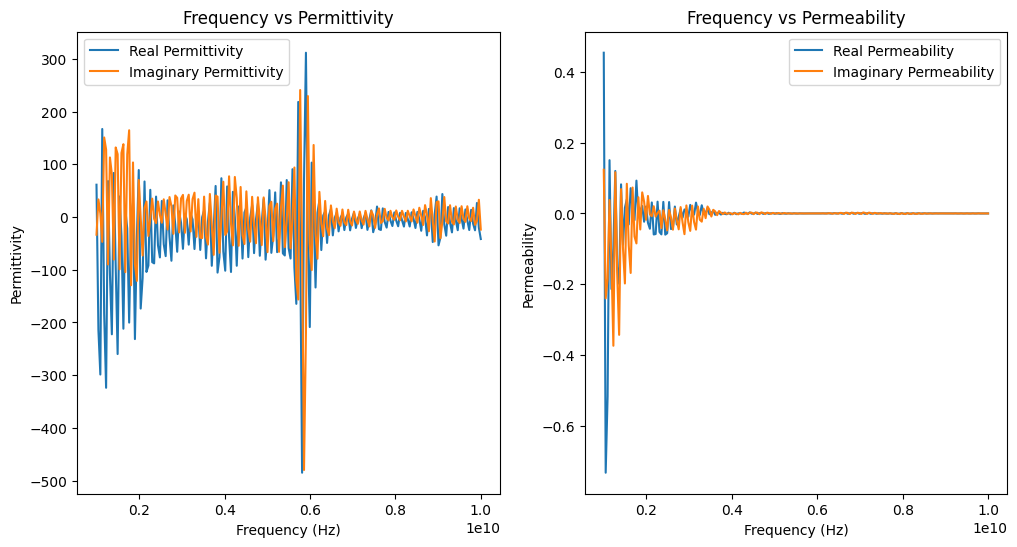

        frequency  permittivity_real  permittivity_imag  permeability_real  \
0    1.000000e+09          61.175618         -33.657469           0.454284   
1    1.045000e+09        -214.221197          33.267963          -0.732935   
2    1.090000e+09        -298.876161           6.782934          -0.516288   
3    1.135000e+09         166.886283         -47.194278           0.150510   
4    1.180000e+09        -183.943598         150.807920          -0.213741   
..            ...                ...                ...                ...   
196  9.820000e+09         -12.739385          17.452978          -0.000218   
197  9.865000e+09         -25.321712         -14.995565          -0.000071   
198  9.910000e+09          26.536131          -6.956925           0.000085   
199  9.955000e+09         -20.449410          32.625274          -0.000071   
200  1.000000e+10         -41.828917         -23.923602          -0.000014   

     permeability_imag  
0             0.123472  
1            

In [ ]:
import numpy as np
import pandas as pd
import cmath
import matplotlib.pyplot as plt

# Assume data is already read into a DataFrame called 'data'
# Example: data = pd.read_csv('your_file.csv')

# Ensure frequency is in float format
data['Freq(Hz)'] = data['Freq(Hz)'].astype(float)

# Extract frequency, S21 dB, and S21 degrees
frequency = data['Freq(Hz)'].values
s21_db = data['S21(DB)'].values
s21_deg = data['S21(DEG)'].values

# Convert S21 from dB and degrees to complex form
s21_mag = 10 ** (s21_db / 20)
s21_phase_rad = np.deg2rad(s21_deg)
s21_complex = s21_mag * np.exp(1j * s21_phase_rad)

# Constants
c = 3e8  # Speed of light in vacuum (m/s)

# Assume the material sample length (d) is known
d = 0.01  # Example: 1 cm

# Initialize lists to store permittivity and permeability
permittivity = []
permeability = []

# Calculate the permittivity and permeability using the NRW method
for freq, s21 in zip(frequency, s21_complex):
    omega = 2 * np.pi * freq
    beta = omega / c

    # Calculate the reflection coefficient (Gamma)
    R = (s21 - 1) / (s21 + 1)

    # Calculate the transmission coefficient (T)
    T = np.sqrt(1 - R**2)

    # Calculate the complex refractive index (n)
    n = cmath.acos(T) / (beta * d)

    # Calculate the complex permittivity (epsilon) and permeability (mu)
    epsilon_r = (1 - R) / (1 + R)
    mu_r = (1 + R) / (1 - R)

    # Calculate epsilon and mu using the refractive index
    epsilon = (n**2) / mu_r
    mu = mu_r * (n**2) / epsilon_r

    permittivity.append(epsilon)
    permeability.append(mu)

# Convert lists to numpy arrays for easier handling
permittivity = np.array(permittivity)
permeability = np.array(permeability)

# Output the results
results = pd.DataFrame({
    'frequency': frequency,
    'permittivity_real': np.real(permittivity),
    'permittivity_imag': np.imag(permittivity),
    'permeability_real': np.real(permeability),
    'permeability_imag': np.imag(permeability)
})

# Get the filename of the uploaded file
filename = list(uploaded_files.keys())[0]  # Get the filename

# Create the plot filename
plot_filename = filename.split('.')[0] + "_plot.png"

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot permittivity
plt.subplot(1, 2, 1)
plt.plot(frequency, np.real(permittivity), label='Real Permittivity')
plt.plot(frequency, np.imag(permittivity), label='Imaginary Permittivity')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Permittivity')
plt.title('Frequency vs Permittivity')
plt.legend()

# Plot permeability
plt.subplot(1, 2, 2)
plt.plot(frequency, np.real(permeability), label='Real Permeability')
plt.plot(frequency, np.imag(permeability), label='Imaginary Permeability')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Permeability')
plt.title('Frequency vs Permeability')
plt.legend()

# Save the plot as a PNG file with the appropriate filename
plt.savefig(plot_filename)
plt.show()

# Create the new CSV filename
new_filename = filename.split('.')[0] + "_euvalues.csv"

# Save the results to a CSV file
results.to_csv(new_filename, index=False)

# Print the results
print(results)
